In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# To avoid the kernel dead state
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
# path to training and vaildation data
train_dir = "train"
val_dir = "val"
test_dir = "test"

image_size = (150, 150)    # target image size
batch_size = 64

In [4]:
train_datagen = ImageDataGenerator(
                      rotation_range=40,
                      width_shift_range=.2,
                      height_shift_range=.2,
                      shear_range=.2,
                      zoom_range=.2,
                      horizontal_flip=True,
                      fill_mode='nearest'
                  )

train_ds = train_datagen.flow_from_directory(
                                                directory=train_dir,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                target_size=(150, 150), 
                                                seed = 43
                                            )

Found 3019 images belonging to 5 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

Found 649 files belonging to 5 classes.
Found 649 files belonging to 5 classes.


In [6]:
ValLoss_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
ValAcc_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [7]:
Loss_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Acc_callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [8]:
ModelCheck_callback = keras.callbacks.ModelCheckpoint(
    filepath='Models/final_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [15]:
#all_callbacks = [ValLoss_callback, ValAcc_callback, Loss_callback, Acc_callback, ModelCheck_callback]
all_callbacks = [ModelCheck_callback]

In [9]:
def plot_curves(hist):
    accuracy = hist.history["accuracy"]
    val_accuracy = hist.history["val_accuracy"]
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "r", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "r", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

In [10]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [16]:
model.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[all_callbacks])

Epoch 1/10
48/48 [==============================] - 192s 4s/step - loss: 1.0654 - accuracy: 0.6419 - val_loss: 0.9850 - val_accuracy: 0.6317
Epoch 2/10
48/48 [==============================] - 191s 4s/step - loss: 0.9178 - accuracy: 0.6668 - val_loss: 1.1171 - val_accuracy: 0.5747
Epoch 3/10
48/48 [==============================] - 191s 4s/step - loss: 0.8701 - accuracy: 0.6684 - val_loss: 0.8703 - val_accuracy: 0.7381
Epoch 4/10
48/48 [==============================] - 188s 4s/step - loss: 0.8821 - accuracy: 0.6767 - val_loss: 0.9253 - val_accuracy: 0.6410
Epoch 5/10
48/48 [==============================] - 159s 3s/step - loss: 0.8309 - accuracy: 0.6770 - val_loss: 0.9938 - val_accuracy: 0.6579
Epoch 6/10
48/48 [==============================] - 110s 2s/step - loss: 0.8062 - accuracy: 0.6923 - val_loss: 1.1060 - val_accuracy: 0.5547
Epoch 7/10
48/48 [==============================] - 114s 2s/step - loss: 0.7653 - accuracy: 0.7098 - val_loss: 0.8790 - val_accuracy: 0.6579
Epoch 8/10
48

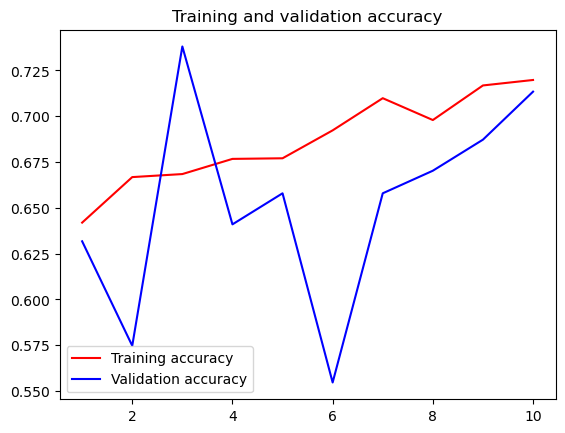

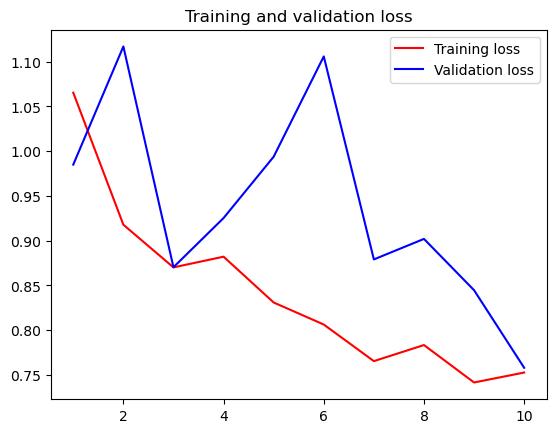

In [17]:
plot_curves(hist)

In [18]:
model.evaluate(test_ds)

11/11 [==============================] - 4s 332ms/step - loss: 0.8091 - accuracy: 0.7042


[0.8091086745262146, 0.7041602730751038]